<a href="https://colab.research.google.com/github/Sukanya-Dokala/IPL-Data-Insights/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up **API Kaggle**

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Listening Datasets Available

In [ ]:
!kaggle datasets list

### Inspecting Contents of the IPL Dataset via Kaggle API

In [3]:
!kaggle datasets files -d patrickb1912/ipl-complete-dataset-20082020

name                size  creationDate                
--------------  --------  --------------------------  
deliveries.csv  27019953  2024-06-08 07:13:14.364000  
matches.csv       225266  2024-06-08 07:13:13.897000  


### **Download** IPL Complete Dataset (2008-2020) from Kaggle

In [ ]:
!kaggle datasets download -d patrickb1912/ipl-complete-dataset-20082020

In [ ]:
!unzip ipl-complete-dataset-20082020.zip

### Importing required libraries and Datasets

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
deliveries=pd.read_csv("/content/deliveries.csv")
matches=pd.read_csv("/content/matches.csv")

In [48]:
matches.tail(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,data,toss_winner_won_match
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,Non D/L,KN Ananthapadmanabhan,MV Saidharshan Kumar,2024-05-22,True
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,Non D/L,Nitin Menon,VK Sharma,2024-05-24,False
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,114.0,20.0,N,Non D/L,J Madanagopal,Nitin Menon,2024-05-26,False


In [47]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN


In [10]:
matches.shape

(1095, 20)

In [11]:
deliveries.shape

(260920, 17)

# Data Cleaning

In [12]:
matches.info()
matches.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [ ]:
matches['team1'].unique()

In [ ]:
#Replacing Royal Challengers Bengalore in place of Royal Challengers Bengaluru

matches['team1'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'})
matches['team2'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'})
matches['toss_winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'})
matches['winner'].replace({'Royal Challengers Bengaluru':'Royal Challengers Bangalore'})

In [15]:
#Replacing old Team names With New Team Names in matches Table
replacement_map={'Rising Pune Supergiants':'Rising Pune Supergiant',
                 'Kings XI Punjab':'Punjab Kings',
                 'Delhi Daredevils':'Delhi Capitals',
                 'Deccan Chargers':'Sunrisers Hyderabad',
                 'Gujarat Lions':'Gujarat Titans',
                 'Pune Warriors':'Rising Pune Supergiant',

                 }

columns_to_relace =['team1','team2','winner','toss_winner']

matches[columns_to_relace]=matches[columns_to_relace].replace(replacement_map)

In [16]:
#Replacing old Team names With New Team Names in deliveries Table
replacement_map={'Rising Pune Supergiants':'Rising Pune Supergiant',
                 'Kings XI Punjab':'Punjab Kings',
                 'Delhi Daredevils':'Delhi Capitals',
                 'Deccan Chargers':'Sunrisers Hyderabad',
                 'Gujarat Lions':'Gujarat Titans',
                 'Pune Warriors':'Rising Pune Supergiant',
                 'Royal Challengers Bengaluru':'Royal Challengers Bangalore'
                 }
columns_to_relace=['batting_team','bowling_team']
deliveries[columns_to_relace]=deliveries[columns_to_relace].replace(replacement_map)

In [ ]:
matches['city'].replace({'Bengaluru':'Bangalore'},inplace=True)
matches['city'].replace({'Chandigarh':'Mohali'},inplace=True)

In [37]:
matches['method'].value_counts()
# matches['method'].isna().sum()
# matches.info()

,count
method,
Non D/L,1074
D/L,21


In [ ]:
matches['method'].fillna('Non D/L',inplace=True)
matches['city'].fillna('Unknown',inplace=True)

# Analysis

### Succes Ratio

In [ ]:
#Calculating Total Matches winned By each Team

total_wins=matches.groupby('winner').size()



#Calculating Total Matches Win by each Team(played as Team1 and Played as Team2)

matches_played_as_team1=matches.groupby('team1').size()
matches_played_as_team2=matches.groupby('team2').size()

total_matches_played=matches_played_as_team1+matches_played_as_team2

#Calculating Success ratio

success_ratio=total_wins/total_matches_played
success_ratio_desc=success_ratio.sort_values(ascending=False)
success_ratio_desc


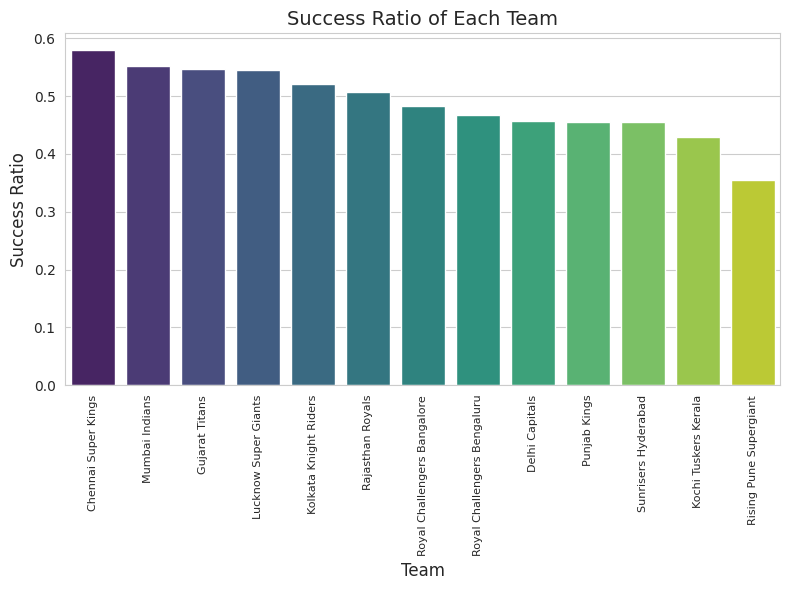

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x=success_ratio_desc.index,y=success_ratio_desc.values,palette='viridis',hue=success_ratio_desc.index,legend=False)
plt.xticks(rotation=90,fontsize=8)
plt.xlabel('Team',fontsize=12)
plt.ylabel('Success Ratio',fontsize=12)
plt.title('Success Ratio of Each Team',fontsize=14)
plt.tight_layout()
plt.show()

### Title Winners for Each Season

In [41]:
matches['data']=pd.to_datetime(matches['date'])
matches_sorted=matches.sort_values(by=['season','date'],ascending=True)
season_final_match=matches_sorted.groupby('season').tail(1)
season_winner=season_final_match[['season','winner']]
season_winner

,season,winner
57,2007/08,Rajasthan Royals
114,2009,Sunrisers Hyderabad
174,2009/10,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [ ]:
# how many times each team has won the IPL titl
season_winner['winner'].value_counts()

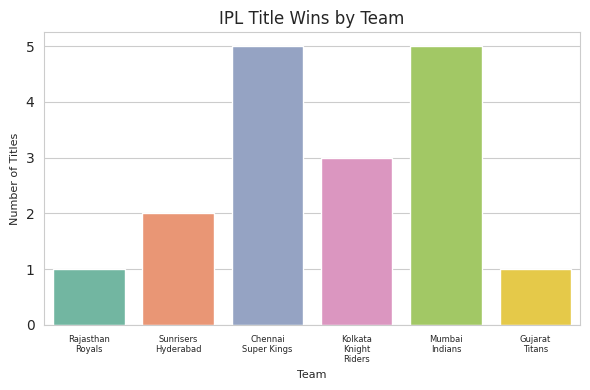

In [43]:
import textwrap
def wrap_labels(labels, wrap_width):
    return ['\n'.join(textwrap.wrap(label, wrap_width)) for label in labels]

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')

ax=sns.countplot(x='winner', data=season_winner, palette='Set2', hue='winner', legend=False)

tick_locations = ax.get_xticks()
current_labels = [item.get_text() for item in plt.gca().get_xticklabels()]


wrapped_labels = wrap_labels(current_labels, 12)
ax.set_xticks(tick_locations)
ax.set_xticklabels(wrapped_labels, fontsize=6)

plt.title('IPL Title Wins by Team', fontsize=12)
plt.xlabel('Team', fontsize=8)
plt.ylabel('Number of Titles', fontsize=8)

plt.tight_layout()
plt.show()


### Top 10 Batmans

In [ ]:
batsman_runs=deliveries.groupby('batter')['batsman_runs'].sum().reset_index(name='runs')
batsman_runs_desc=batsman_runs.sort_values(by='runs',ascending=False)
top_10=batsman_runs_desc.head(10)
print(top_10)

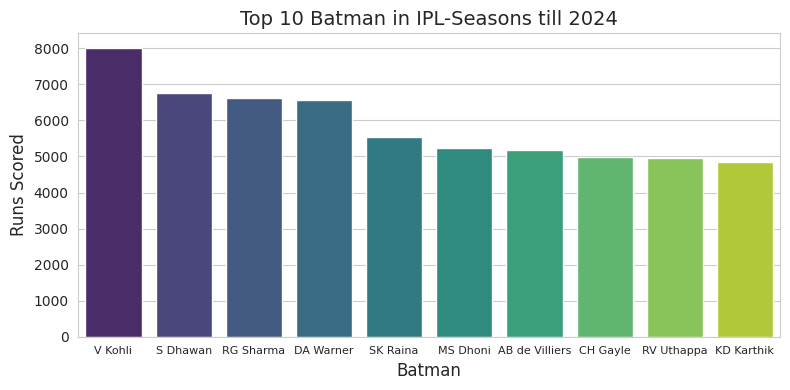

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(x='batter',y='runs',data=top_10,palette='viridis',hue='batter')
plt.xticks(fontsize=8)
plt.xlabel('Batman',fontsize=12)
plt.ylabel('Runs Scored',fontsize=12)
plt.title('Top 10 Batman in IPL-Seasons till 2024',fontsize=14)
plt.tight_layout()

### Top 10 Performance in IPL Matches till 2024(Batting)

In [ ]:
batsman_ings=deliveries.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index(name='batsman_runs')
top_batsman_scores=batsman_ings.sort_values(by='batsman_runs',ascending=False)[:10]

batsman_balls_faced=deliveries.groupby(['match_id','batter'])['batsman_runs'].count().reset_index(name='Ball faced')

batsman_performance=pd.merge(top_batsman_scores,batsman_balls_faced,how='inner',on=['match_id','batter'])
strike_rate=np.round(batsman_performance['batsman_runs']/batsman_performance['Ball faced']*100,2)
batsman_performance['strike_rate']=strike_rate
batsman_performance.head(10)

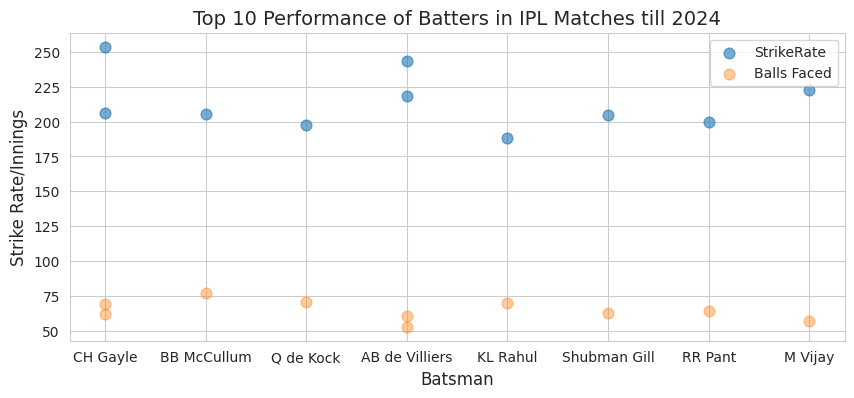

In [28]:
plt.figure(figsize=(10,4))
plt.scatter(batsman_performance['batter'],batsman_performance['strike_rate'],label='StrikeRate',s=60,alpha=0.6)
plt.scatter(batsman_performance['batter'],batsman_performance['Ball faced'],label='Balls Faced',s=60,alpha=0.4)
plt.title('Top 10 Performance of Batters in IPL Matches till 2024',fontsize=14)
plt.xlabel('Batsman',fontsize=12)
plt.ylabel('Strike Rate/Innings',fontsize=12)
plt.legend(loc='best')
plt.show()

### Top 10 Bowlers

In [46]:
bowling_wickets=deliveries[deliveries["dismissal_kind"]!="run out"]
wickets=bowling_wickets.groupby(["bowler"])["dismissal_kind"].count().reset_index(name="wickets")
top10_bowlers=wickets.sort_values(ascending=False,by="wickets")
top10=top10_bowlers.head(10)
print(top10)

         bowler  wickets
524   YS Chahal      205
348   PP Chawla      192
119    DJ Bravo      183
355    R Ashwin      181
71      B Kumar      181
446   SP Narine      180
8      A Mishra      174
438  SL Malinga      170
193   JJ Bumrah      168
373   RA Jadeja      160


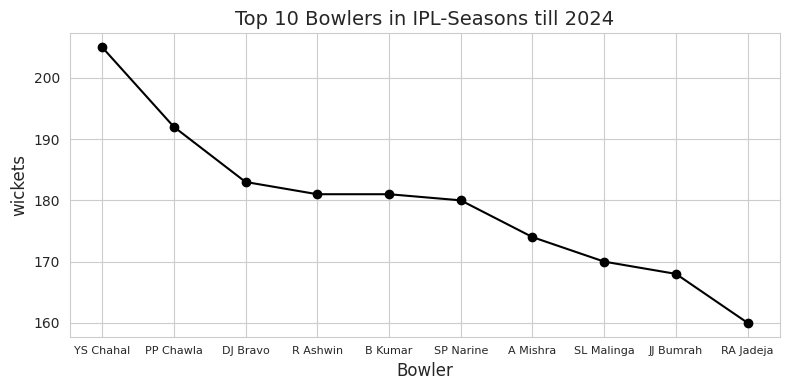

In [30]:
plt.figure(figsize=(8,4))
plt.plot(top10["bowler"],top10["wickets"],marker="o",color="black")
plt.xticks(fontsize=8)
plt.xlabel('Bowler',fontsize=12)
plt.ylabel('wickets',fontsize=12)
plt.title('Top 10 Bowlers in IPL-Seasons till 2024',fontsize=14)
plt.tight_layout()

### Top 10 Performance in IPL Matches till 2024(Bowling)

In [31]:
match_top_bowlers=deliveries.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name="Wickets").sort_values(ascending=False,by="Wickets").head(10)

match_bowlers_runs=deliveries.groupby(["match_id","bowler"])["total_runs"].sum().reset_index(name="Runs Conceded")

match_top_bowlers = deliveries.groupby(["match_id","bowler"])["dismissal_kind"].count().reset_index(name="Wickets").sort_values(ascending=False,by="Wickets").head(10)
match_bowler_performance=pd.merge(match_top_bowlers,match_bowlers_runs,how="inner",on=["match_id","bowler"])

match_bowler_performance["Runs per Wicket"]=np.round(match_bowler_performance["Runs Conceded"]/match_bowler_performance["Wickets"],1)


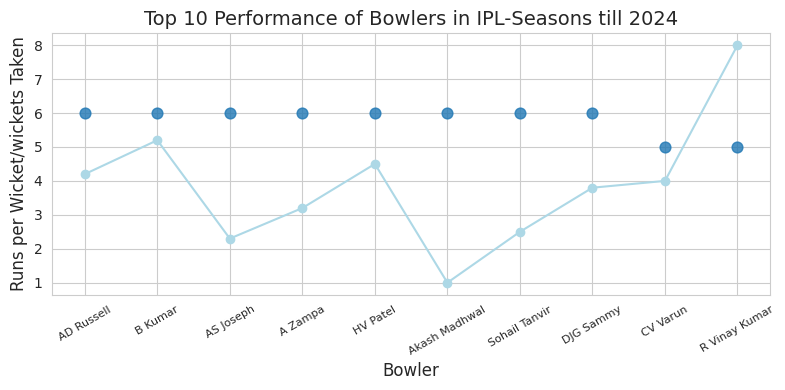

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(match_bowler_performance["bowler"],match_bowler_performance["Wickets"],alpha=0.8,s=60,label="Wickets")
plt.plot(match_bowler_performance["bowler"],match_bowler_performance["Runs per Wicket"],marker="o",color="lightblue",label="Runs per Wicket")
# plt.legend(loc="best")
plt.xticks(fontsize=8)
plt.xlabel('Bowler',fontsize=12)
plt.ylabel('Runs per Wicket/wickets Taken',fontsize=12)
plt.xticks(rotation=30)
plt.title('Top 10 Performance of Bowlers in IPL-Seasons till 2024',fontsize=14)
plt.tight_layout()

### Highest Scores Achieved in IPL till 2024

In [33]:
match_score=deliveries.groupby(["match_id","batting_team","bowling_team"])["total_runs"].sum().reset_index(name="Match Score")
top10_scored_matches=match_score.sort_values(ascending=False,by="Match Score").head(10)
top10_scored_matches

,match_id,batting_team,bowling_team,Match Score
2104,1426268,Sunrisers Hyderabad,Royal Challengers Bangalore,287
2060,1422126,Sunrisers Hyderabad,Mumbai Indians,277
2076,1422134,Kolkata Knight Riders,Delhi Capitals,272
2114,1426273,Sunrisers Hyderabad,Delhi Capitals,266
702,598027,Royal Challengers Bangalore,Rising Pune Supergiant,263
2128,1426280,Punjab Kings,Kolkata Knight Riders,262
2103,1426268,Royal Challengers Bangalore,Sunrisers Hyderabad,262
2127,1426280,Kolkata Knight Riders,Punjab Kings,261
2129,1426281,Delhi Capitals,Mumbai Indians,257
1972,1359512,Lucknow Super Giants,Punjab Kings,257


### Distribution of Venues for Top 10 Highest Scoring Innings

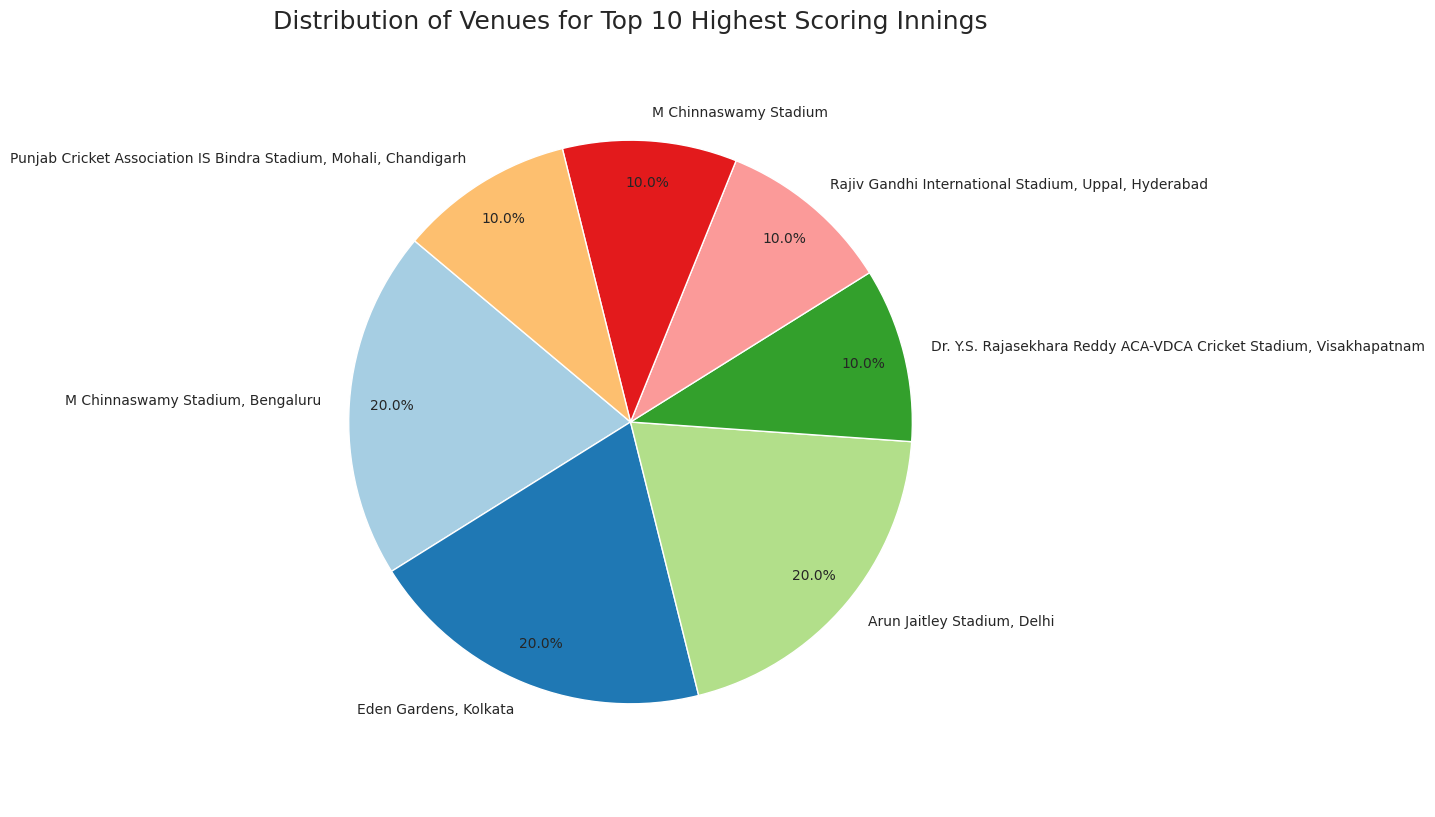

In [34]:
venue=matches[["id","venue"]]
venue.head(10)


top10_matches_venue=pd.merge(top10_scored_matches,venue,how="inner",left_on="match_id",right_on="id")
top10_matches_venue.drop("id",axis=1,inplace=True)
top10_matches_venue

venue_counts = top10_matches_venue['venue'].value_counts()

plt.figure(figsize=(8,10))
plt.pie(venue_counts, labels=venue_counts.index, autopct='%1.1f%%', startangle=140,
        pctdistance=0.85, colors=plt.cm.Paired.colors)
plt.title('Distribution of Venues for Top 10 Highest Scoring Innings', fontsize=18)
plt.axis('equal')
plt.show()

### Impact of Toss on Match Outcome

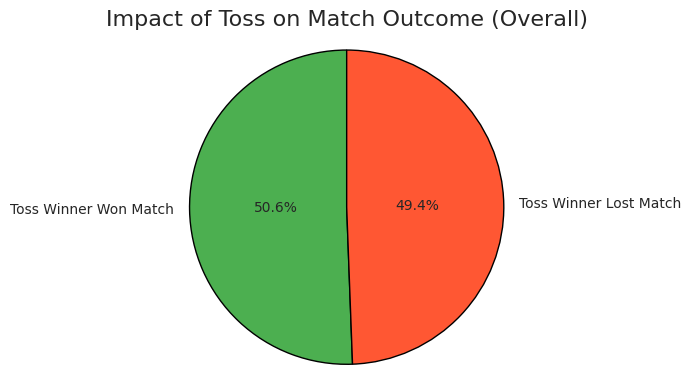

In [35]:
matches['toss_winner_won_match'] = (matches['toss_winner'] == matches['winner'])

toss_outcome_counts = matches['toss_winner_won_match'].value_counts()


plt.figure(figsize=(6,4))
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
colors = ['#4CAF50', '#FF5733']

plt.pie(toss_outcome_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        pctdistance=0.45,
        wedgeprops={'edgecolor': 'black'})

plt.title('Impact of Toss on Match Outcome (Overall)', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()